In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
churn_data.shape

(10000, 14)

In [6]:
churn_data.size

140000

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

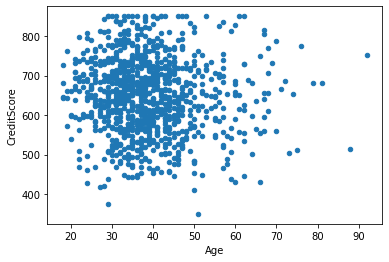

In [8]:
churn_data.sample(1000).plot.scatter(x='Age', y='CreditScore')

No handles with labels found to put in legend.


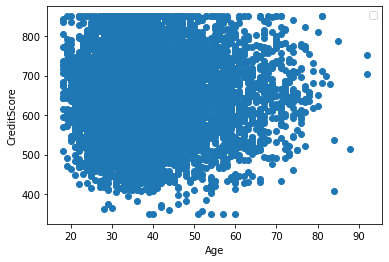

In [9]:
plt.scatter(x=churn_data['Age'], y=churn_data['CreditScore'])
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

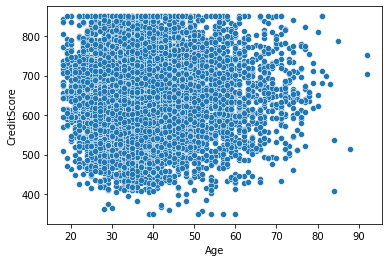

In [10]:
sns.scatterplot(data= churn_data, x='Age', y='CreditScore')

In [11]:
churn_data_age_cs = churn_data.groupby('Age')[['CreditScore', 'EstimatedSalary']].mean().reset_index()

In [12]:
churn_data_age_cs

,Age,CreditScore,EstimatedSalary
0,18,686.681818,85102.389545
1,19,665.629630,97734.100370
2,20,665.050000,97705.542000
3,21,647.283019,102536.673774
4,22,636.547619,98321.615476
...,...,...,...
65,83,678.000000,92934.410000
66,84,472.500000,187360.250000
67,85,787.000000,116537.960000
68,88,513.000000,52952.240000


<AxesSubplot:xlabel='Age'>

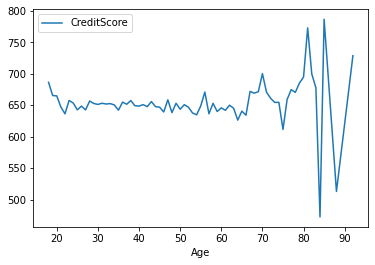

In [13]:
churn_data_age_cs.plot.line(x='Age', y='CreditScore')

<AxesSubplot:xlabel='Age'>

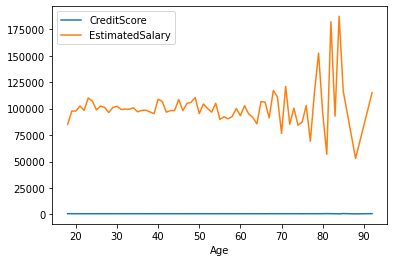

In [14]:
churn_data_age_cs.plot.line('Age')

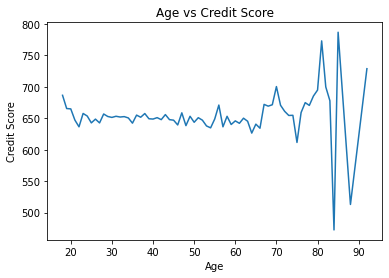

In [15]:
plt.plot(churn_data_age_cs['Age'].values, churn_data_age_cs['CreditScore'].values)
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Age vs Credit Score')
plt.show()


In [16]:
churn_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
churn_data_sal = churn_data.groupby('Gender')[['EstimatedSalary', 'CreditScore']].mean().reset_index()
churn_data_sal

,Gender,EstimatedSalary,CreditScore
0,Female,100601.541382,650.831389
1,Male,99664.576931,650.276892


<AxesSubplot:xlabel='Gender'>

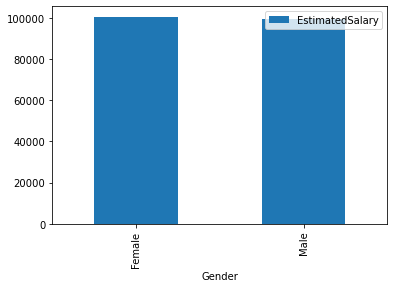

In [18]:
churn_data_sal.plot.bar(x='Gender', y='EstimatedSalary')

<BarContainer object of 2 artists>

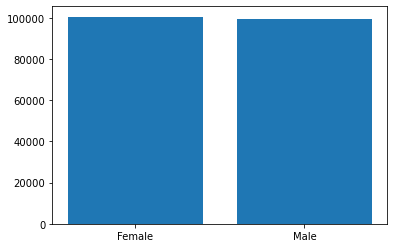

In [19]:
plt.bar(churn_data_sal['Gender'], churn_data_sal['EstimatedSalary'])

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

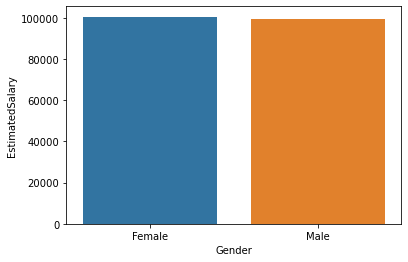

In [20]:
sns.barplot(x='Gender', y='EstimatedSalary', data=churn_data_sal)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

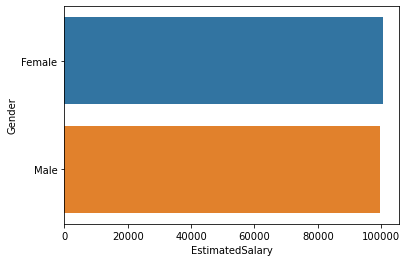

In [21]:
sns.barplot(y='Gender', x='EstimatedSalary', data= churn_data_sal, orient='h')

<AxesSubplot:>

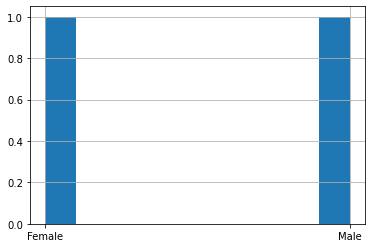

In [22]:
churn_data_sal['Gender'].hist()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

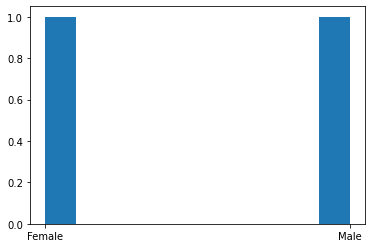

In [23]:
plt.hist(churn_data_sal['Gender'])

<AxesSubplot:>

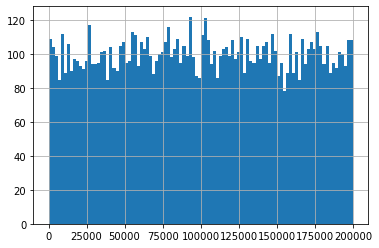

In [24]:
churn_data['EstimatedSalary'].hist(bins=100)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

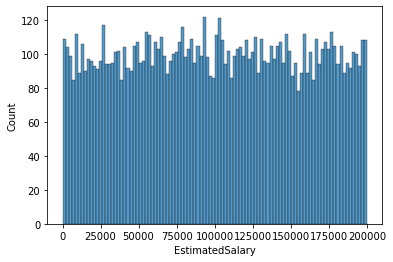

In [25]:
sns.histplot(data=churn_data, x='EstimatedSalary', bins=100)

In [26]:
plt.savefig("hist1.svg")

<Figure size 432x288 with 0 Axes>

In [27]:
churn_data['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [30]:
churn_data['gender_color'] = churn_data["Gender"].apply(lambda x:"red" if x=='Male' else "blue" )

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

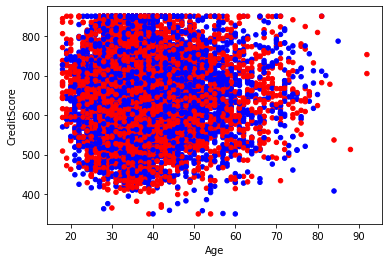

In [33]:
churn_data.plot.scatter(x='Age', y='CreditScore', c=churn_data['gender_color'])

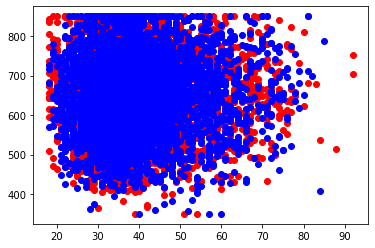

In [38]:
for i in ['Male', 'Female']:
    c = 'red' if i=='Male' else 'blue'
    i_churn = churn_data[churn_data['Gender']==i]
    plt.scatter(x=i_churn['Age'], y=i_churn['CreditScore'], color=c)

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

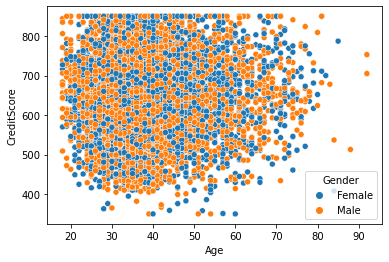

In [39]:
sns.scatterplot(data=churn_data, x='Age', y='CreditScore', hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

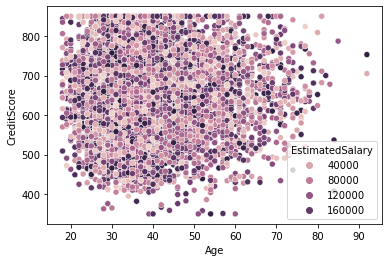

In [40]:
sns.scatterplot(data=churn_data, x='Age', y='CreditScore', hue='EstimatedSalary')

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

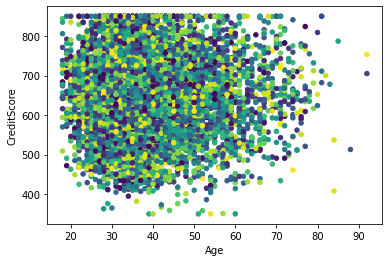

In [41]:
churn_data.plot.scatter(x='Age', y='CreditScore', c=churn_data['EstimatedSalary'])

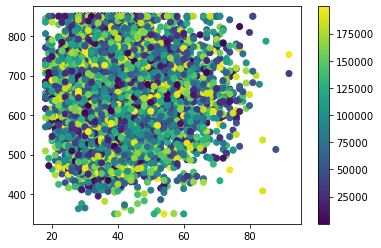

In [43]:
col=plt.scatter(x=churn_data['Age'], y=churn_data['CreditScore'], c=churn_data['EstimatedSalary'])
plt.colorbar(col)

In [53]:
churn_data_sal = churn_data.groupby(['Age', 'Gender'])[['CreditScore', 'EstimatedSalary']].mean().reset_index()

In [63]:
#sns.lineplot(data=churn_data_sal, x='Age', y='CreditScore', row='Gender')

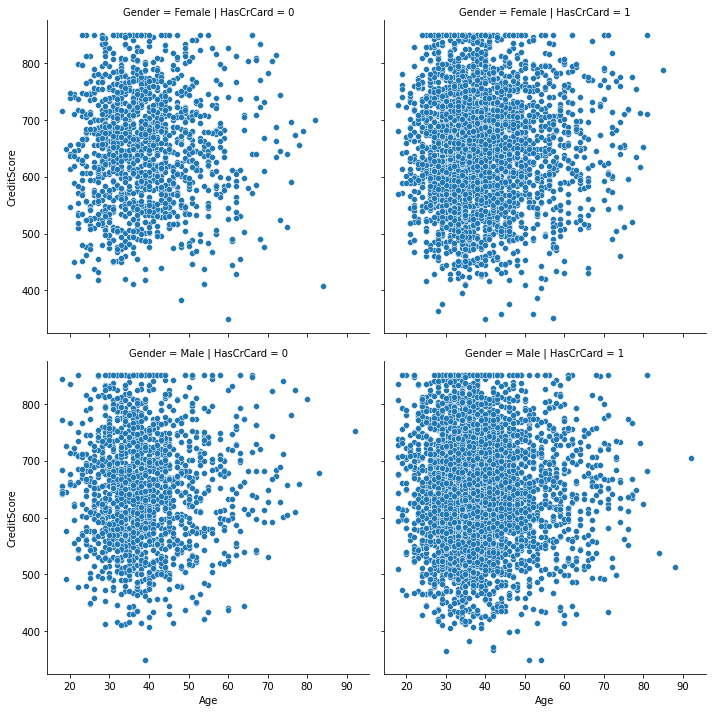

In [64]:
sns.relplot(data=churn_data, x='Age', y='CreditScore', row='Gender', col='HasCrCard')

C:\Users\hp\AppData\Local\Temp/ipykernel_9964/879202021.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  churn_data_age_cs[churn_data['Gender']==g].plot.line(x='Age', y='CreditScore', ax=axes[i])
C:\Users\hp\AppData\Local\Temp/ipykernel_9964/879202021.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  churn_data_age_cs[churn_data['Gender']==g].plot.line(x='Age', y='CreditScore', ax=axes[i])


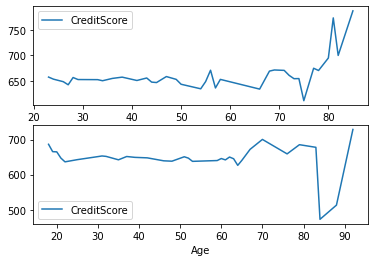

In [67]:
fig, axes= plt.subplots(2,1)
for i, g in enumerate(['Male','Female']):
    churn_data_age_cs[churn_data['Gender']==g].plot.line(x='Age', y='CreditScore', ax=axes[i])

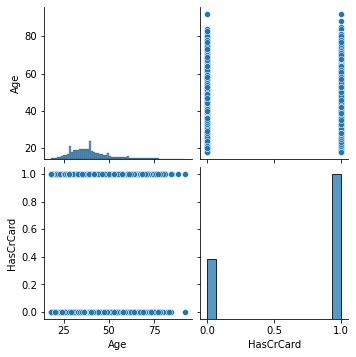

In [70]:
sns.pairplot(data=churn_data[['Age', 'HasCrCard']])

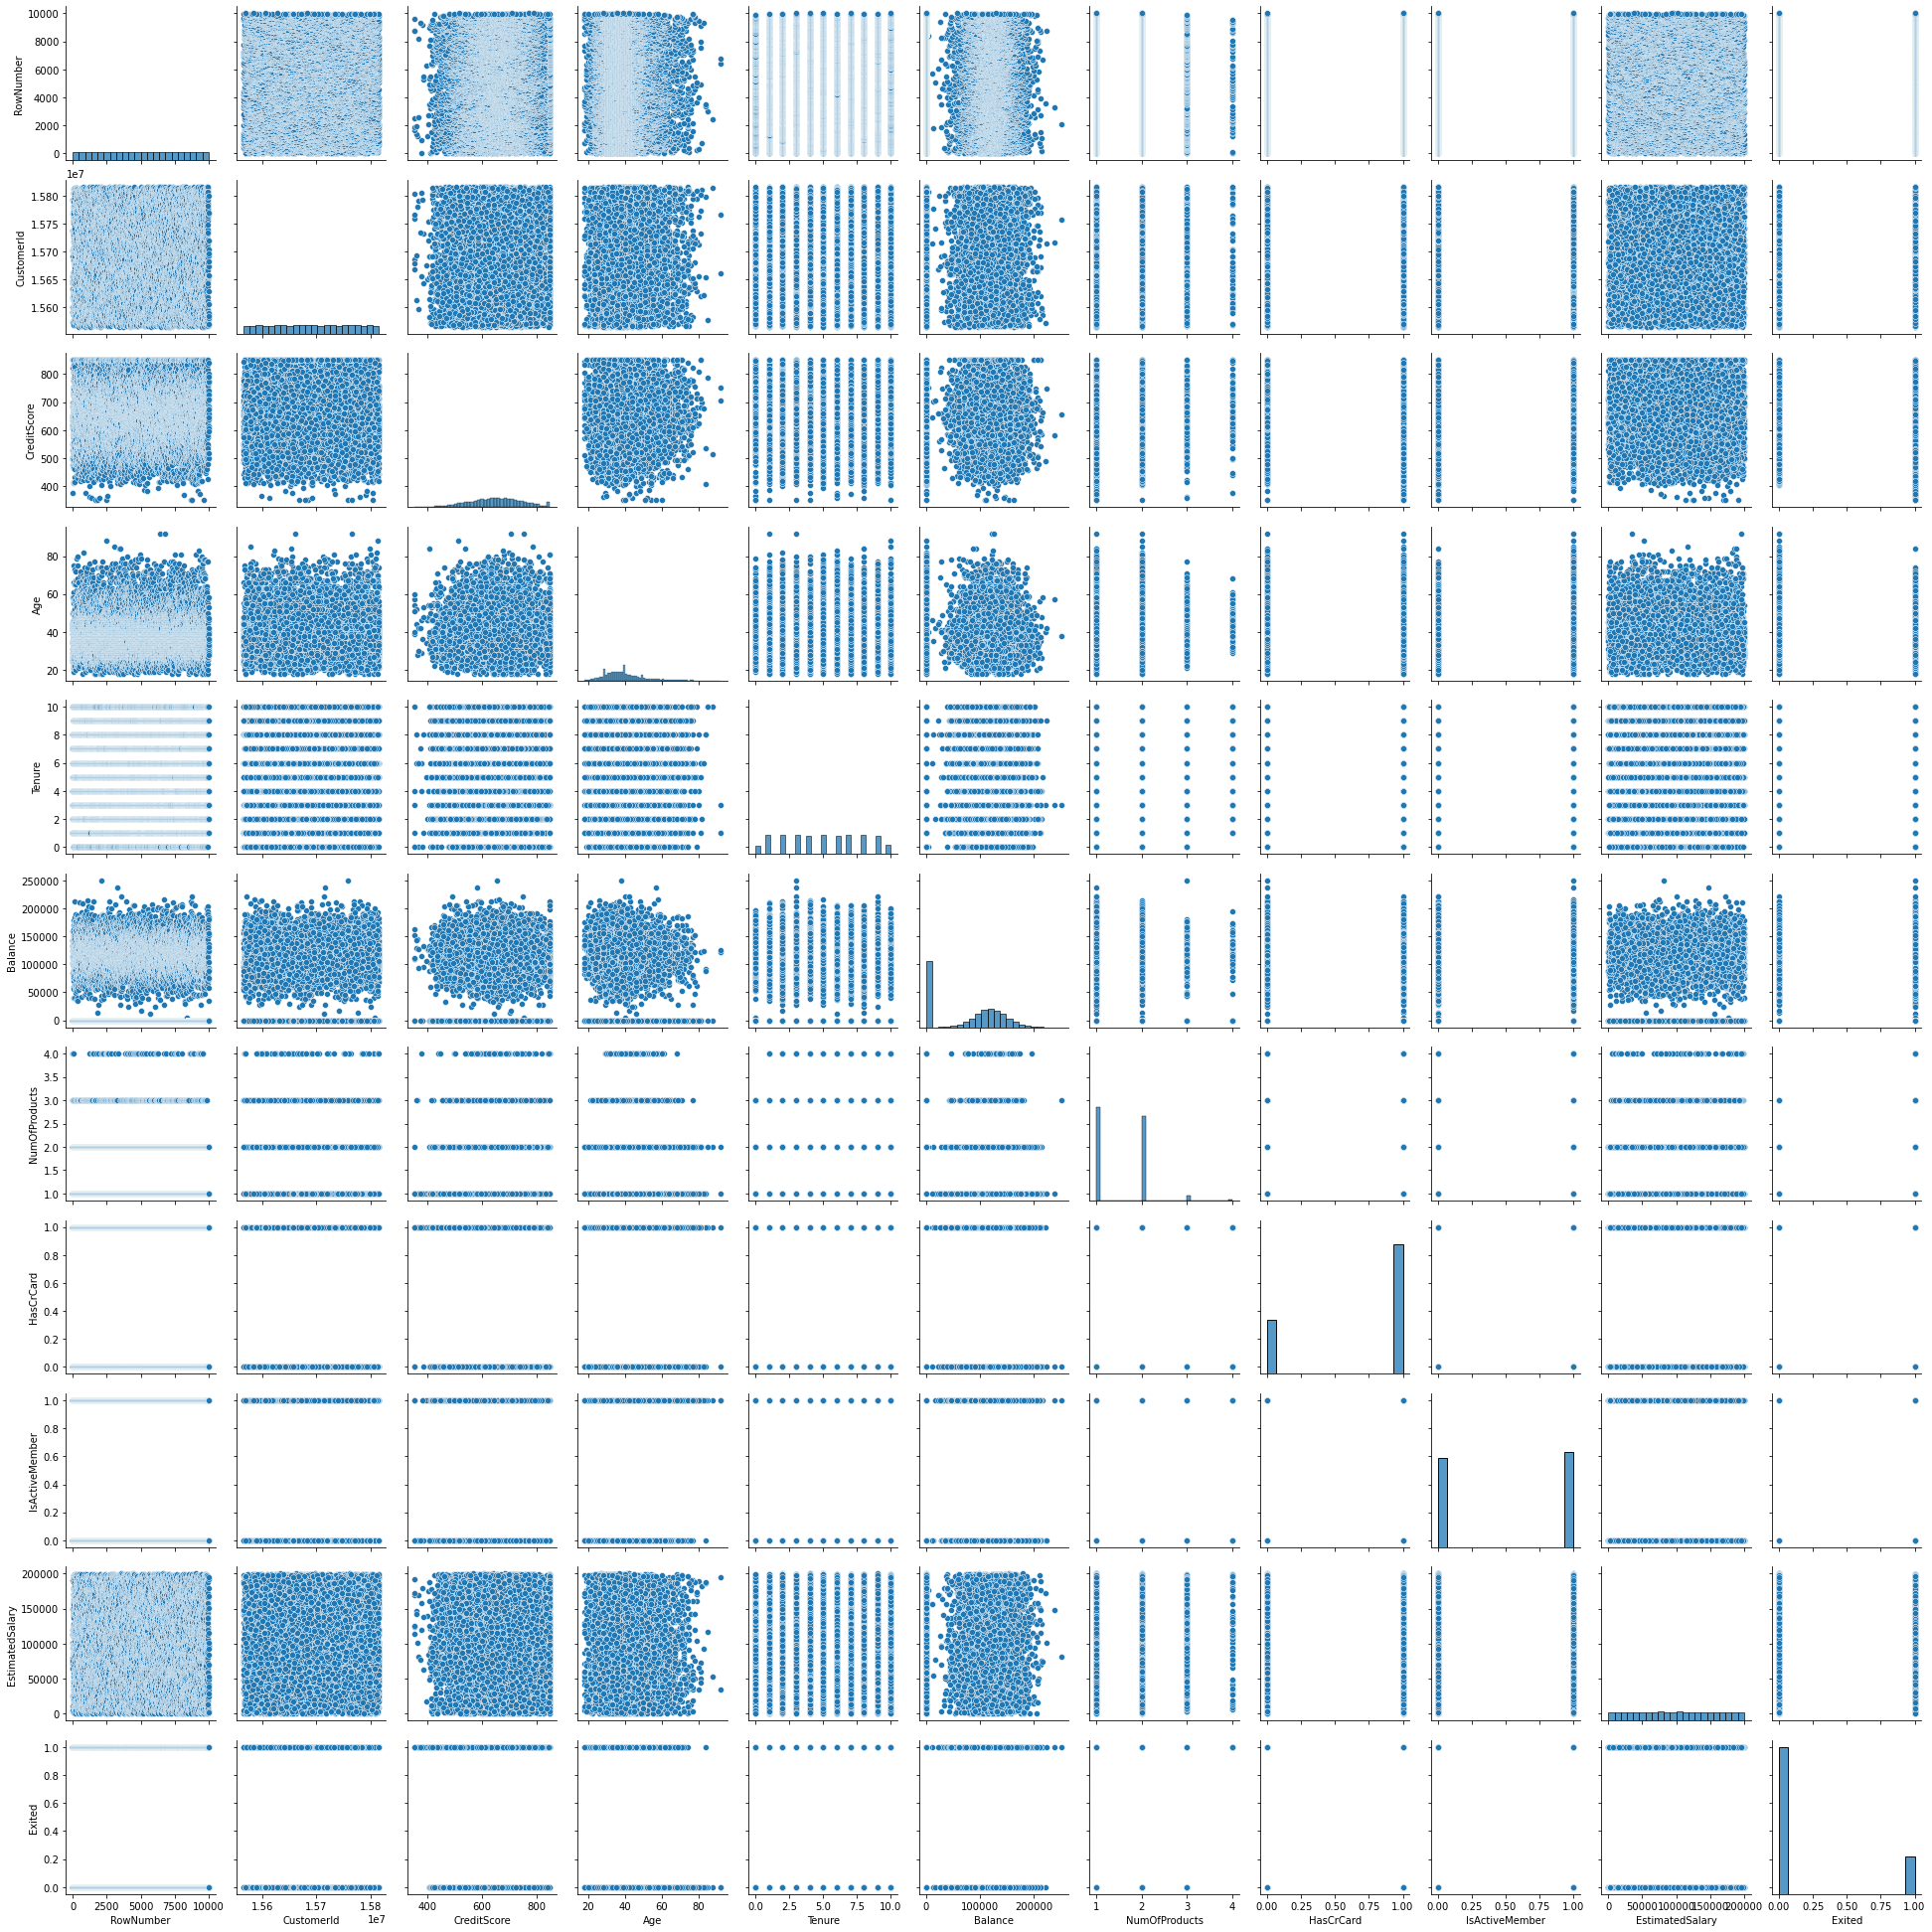

In [72]:
sns.pairplot(data=churn_data)
plt.savefig("plot.svg")